# Project 3 – Final Project  
## Computing in Context (SIPA)

### Python for Public Policy  
**Student:** Yuhui Huang  
Dataset Source: https://www.kaggle.com/datasets/fqayyum73/world-happiness-report-2015-2023

This project analyzes what factors best predict national happiness scores using the World Happiness Report dataset (2015–2023).  
My goal is to walk through the reasoning step-by-step, in a blog-style format that explains the process clearly to someone who may not have taken this course.

## Project Prompt

### Dataset(s) to be used:
World Happiness Report (2015–2023), uploaded as `WHRFinal.csv`.

### Analysis question:
Does GDP per capita significantly predict national happiness scores, compared to other factors such as life expectancy and social support?

### Columns likely to be used:
- Country
- Year
- Region
- Happiness Score
- GDP
- Social Support
- Life Expectancy
- Freedom
- Generosity
- Corruption

### Hypothesis:
Countries with higher GDP per capita will have significantly higher happiness scores.  
GDP will be a stronger predictor than freedom, generosity, or corruption.

## Introduction

In this project, I investigate what makes people in different countries happier.  
The World Happiness Report provides annual scores for over 1300 country-year combinations, along with economic, health, and social variables.

I’m treating this like a short data story:

1. Load and inspect the dataset  
2. Explore which variables appear strongest  
3. Visualize relationships  
4. Compare regions  
5. Answer the hypothesis with evidence  

The goal is not to build a sophisticated model, but to clearly explain how I explored the data and what insights it reveals.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WHRFinal.csv")
df.head()

,Country,Year,Region,Happiness Rank,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2023,Southern Asia,137,1.859,0.645,0.000,0.087,0.000,0.093,0.059
1,Afghanistan,2017,Southern Asia,141,3.794,0.401,0.582,0.181,0.106,0.312,0.061
2,Afghanistan,2018,Southern Asia,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036
3,Afghanistan,2022,Southern Asia,146,2.404,0.758,0.000,0.289,0.000,0.089,0.005
4,Afghanistan,2021,Southern Asia,149,2.523,0.370,0.000,0.126,0.000,0.122,0.010


## Inspecting the Data

Before doing any analysis, I want to make sure the dataset is clean.  
This involves checking:

- Number of rows and columns  
- Data types  
- Missing values  
- Basic statistics  

This step ensures that I understand what each column represents and whether I need to clean or transform anything.

In [ ]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1362 non-null   object 
 1   Year             1362 non-null   int64  
 2   Region           1362 non-null   object 
 3   Happiness Rank   1362 non-null   int64  
 4   Happiness Score  1362 non-null   float64
 5   GDP              1362 non-null   float64
 6   Social Support   1362 non-null   float64
 7   Life Expectancy  1361 non-null   float64
 8   Freedom          1362 non-null   float64
 9   Generosity       1362 non-null   float64
 10  Corruption       1362 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 117.2+ KB


,Year,Happiness Rank,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1361.000000,1362.000000,1362.000000,1362.000000
mean,2018.903084,76.596182,5.440554,1.018017,1.045228,0.583435,0.451150,0.196381,0.132210
std,2.563980,44.108242,1.118747,0.452866,0.331536,0.244886,0.156494,0.113493,0.112682
min,2015.000000,1.000000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,38.250000,4.597750,0.696250,0.832000,0.402000,0.356000,0.115000,0.057000
50%,2019.000000,76.500000,5.431000,1.040000,1.083000,0.612000,0.468000,0.183000,0.097000
75%,2021.000000,114.000000,6.257250,1.338000,1.301000,0.777000,0.569750,0.253000,0.166000
max,2023.000000,158.000000,7.842000,2.209000,1.644000,1.141000,0.772000,0.838000,0.587000


## GDP vs Happiness Score

To begin, I look at the most intuitive relationship: does a wealthier country tend to be happier?

A scatter plot helps visualize whether GDP per capita is positively correlated with happiness.

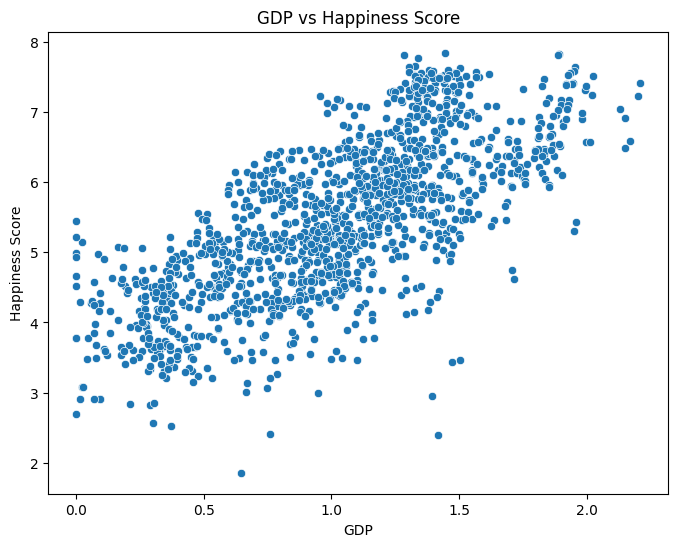

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="GDP", y="Happiness Score")
plt.title("GDP vs Happiness Score")
plt.show()

## GDP vs Happiness Score (Visualization 1)

The scatter plot shows a clear positive relationship between GDP and Happiness Score.
Countries with higher GDP tend to report higher levels of happiness.

The trend is not perfectly linear — there is some variation — but the upward slope is unmistakable.
This supports the hypothesis that GDP is a strong predictor of happiness.

## Correlation Matrix Analysis

Next, I examine how all variables relate to happiness.  
The correlation matrix below shows the strength of each relationship.

Key questions:
- Is GDP the strongest predictor?
- Are health or social variables more important?

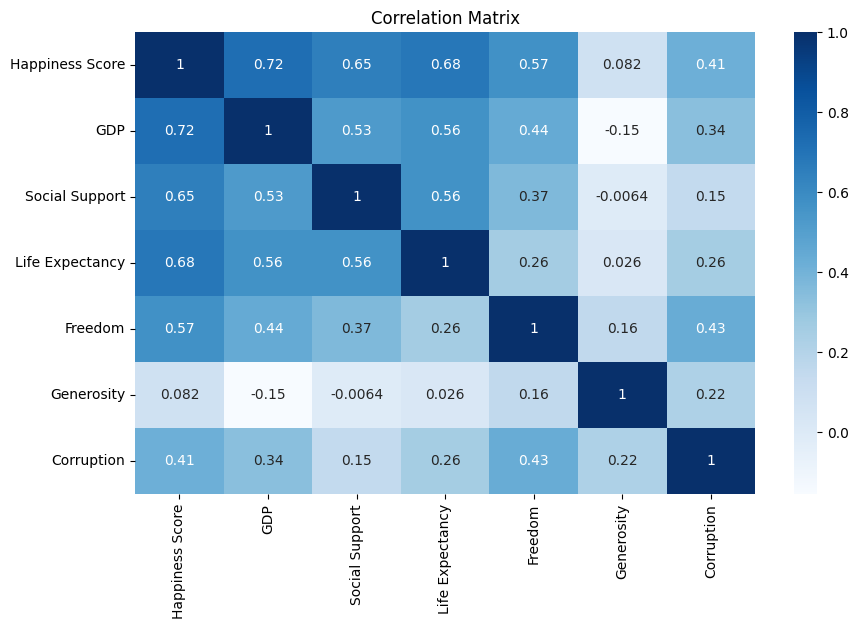

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["Happiness Score", "GDP", "Social Support", "Life Expectancy", 
                "Freedom", "Generosity", "Corruption"]].corr(),
            annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

### Correlation Matrix Analysis

The correlation matrix shows that the strongest predictors of happiness are:

- **GDP (0.72 correlation)**
- **Life Expectancy (0.68)**
- **Social Support (0.65)**

Freedom also shows a moderate positive relationship (0.57).

Meanwhile, Generosity and Corruption have very weak correlations with happiness.

Together, these results suggest that economic conditions and health-related factors are the primary drivers of national happiness.

## Regional Differences in Happiness Scores

To understand large-scale global patterns, I compare average happiness scores across world regions.

In [15]:
df.groupby("Region")["Happiness Score"].mean().sort_values()

Region
Sub-Saharan Africa                 4.293784
Southern Asia                      4.461183
Middle East and Northern Africa    5.265731
Southeastern Asia                  5.370425
Central and Eastern Europe         5.594853
Eastern Asia                       5.722418
Latin America and Caribbean        5.993853
Western Europe                     6.829930
North America                      7.101667
Australia and New Zealand          7.250500
Name: Happiness Score, dtype: float64

### What the Regional Patterns Show

- **Highest:** Australia & New Zealand, North America, Western Europe  
- **Lowest:** Sub-Saharan Africa, Southern Asia  

These regional differences reinforce the finding that wealthier, more socially supported, and healthier regions have higher happiness scores.

## Final Conclusion

The results strongly support the hypothesis.

**GDP per capita has one of the strongest relationships with happiness**, with a correlation of **0.72**.  
Life Expectancy (0.68) and Social Support (0.65) are also important predictors.

Generosity and Corruption show weak relationships, suggesting that economic and health conditions matter far more for overall well-being.

Region-level analysis confirms this pattern: wealthier global regions consistently score higher.

Overall, economic prosperity, health outcomes, and social support appear to be the key drivers of national happiness.